In [ ]:
import pandas as pd
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab  import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
img_path = "/gdrive/My Drive/BitirmeTezi/Animals/"

In [ ]:
labels=['bird','cat','dog']

In [ ]:
def convert_to_mel(filename,dir_path):
 y, sr = librosa.load(dir_path+'/'+filename)
 S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)
 S_dB = librosa.power_to_db(S, ref=np.max)
 librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax,cmap='viridis')
 filename=filename.split('.')[0]
 plt.savefig(f"{dir_path}/{filename}.jpg",bbox_inches='tight',pad_inches=0)

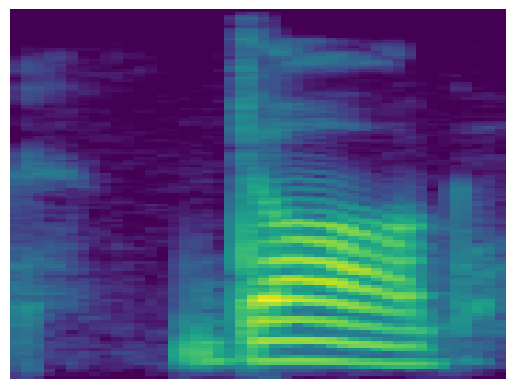

In [ ]:
fig, ax = plt.subplots()
plt.axis('off')
img_list = []
label_list = []

for label in labels:
    dir_path=img_path+label
    for audio_file in os.listdir(dir_path):
        convert_to_mel(audio_file,dir_path)
        img_list.append(dir_path+'/'+audio_file)
        label_list.append(label)

df = pd.DataFrame({'img':img_list, 'label':label_list})

In [2]:
"""
for label in labels:
    dir_path=img_path+label
    for file in os.listdir(dir_path):
        file_type=file.split('.')[1]
        if file_type=='wav':
          os.remove(dir_path+'/'+file)
"""

"\nfor label in labels:\n    dir_path=img_path+label\n    for file in os.listdir(dir_path):\n        file_type=file.split('.')[1]\n        if file_type=='wav':\n          os.remove(dir_path+'/'+file)\n"